In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy
from sklearn.linear_model import LinearRegression
import random
import numpy as np
import seaborn as sns
from matplotlib import patches as mpatches

In [2]:
offense = pd.read_csv("combined_offense.csv")
defense = pd.read_csv("combined_defense.csv")

In [3]:
offense.head()

,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,...,Yds/Rec,Rec_TD,Rec FUM,Scrm Plys,3rd_Conv%,4th Conv%,W,L,T,Win pct
0,Redskins,334,182,54.5,7.2,2391,13,15,71.6,0,...,13.1,13,0,828,NaN,NaN,9,4,1,0.678571
1,49ers,391,209,53.5,6.9,2688,18,24,65.0,0,...,12.9,18,0,900,NaN,NaN,9,5,0,0.642857
2,Chargers,450,244,54.2,7.3,3305,23,28,69.0,0,...,13.5,23,0,859,NaN,NaN,6,8,0,0.428571
3,Steelers,414,214,51.7,5.9,2446,15,26,55.7,0,...,11.4,15,0,867,NaN,NaN,6,8,0,0.428571
4,Cardinals,385,170,44.2,6.9,2656,14,26,51.6,0,...,15.6,14,0,821,NaN,NaN,4,9,1,0.321429


In [4]:
defense.head()

,Team,Att,Cmp,Cmp %,Yds/Att,Yds,TD,INT,Rate,1st,...,PDef,Scrm Plys,3rd_Conv%,4th Conv%,FF,FR,W,L,T,Win pct
0,Redskins,411,191,46.5,6.0,2127,11,29,45.1,0,...,0,855,NaN,NaN,0,0,9,4,1,0.678571
1,49ers,341,152,44.6,6.8,2011,17,14,67.0,0,...,0,787,NaN,NaN,0,0,9,5,0,0.642857
2,Chargers,347,193,55.6,7.0,2262,15,22,65.7,0,...,0,859,NaN,NaN,0,0,6,8,0,0.428571
3,Steelers,408,235,57.6,7.5,2766,16,17,77.0,0,...,0,881,NaN,NaN,0,0,6,8,0,0.428571
4,Cardinals,375,212,56.5,6.8,2380,12,17,69.3,0,...,0,881,NaN,NaN,0,0,4,9,1,0.321429


In [5]:
netya = pd.DataFrame()

In [6]:
netya["netya"] = offense["Yds/Att"] - defense["Yds/Att"]

In [7]:
netya["Win pct"] = offense["Win pct"]

In [8]:
#adds a little bit of noise so points aren't stacked on each other
netya["noise"] = netya["netya"] + random.uniform(0.0, 0.01) 
netya["Team"] = offense["Team"]
netya["Year"] = offense["Year"]
netya.head(3)

,netya,Win pct,noise,Team,Year
0,1.2,0.678571,1.206008,Redskins,1971
1,0.1,0.642857,0.106008,49ers,1971
2,0.3,0.428571,0.306008,Chargers,1971


In [9]:
#Add super bowl winners
champions = pd.read_csv("champions.csv")

In [10]:
netya = pd.merge(netya, champions, how="left")
netya["Champion"] = netya["Champion"].replace(np.nan, "N")
netya

,netya,Win pct,noise,Team,Year,Champion
0,1.2,0.678571,1.206008,Redskins,1971,N
1,0.1,0.642857,0.106008,49ers,1971,N
2,0.3,0.428571,0.306008,Chargers,1971,N
3,-1.6,0.428571,-1.593992,Steelers,1971,N
4,0.1,0.321429,0.106008,Cardinals,1971,N
...,...,...,...,...,...,...
1433,-0.4,0.500000,-0.393992,Bears,2019,N
1434,-0.8,0.312500,-0.793992,Panthers,2019,N
1435,0.6,0.625000,0.606008,Bills,2019,N
1436,1.0,0.875000,1.006008,Ravens,2019,N


In [11]:
#Correlation Coefficient R
lr = LinearRegression()
lr.fit(netya[["netya"]], netya["Win pct"])
r_squared = lr.score(netya[["netya"]], netya["Win pct"])
r = r_squared ** 0.5
r

0.7182994880905594

In [12]:
r_squared

0.5159541545911597

In [13]:
#Best fit line
slope = float(lr.coef_[0])
intercept = float(lr.intercept_)
slope, intercept

(0.14499748034584434, 0.5001691575022306)

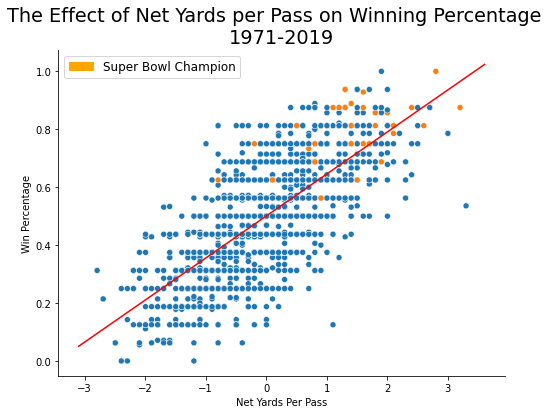

In [14]:
fig, ax = plt.subplots(figsize = (8,6))
plt.rcParams.update({'font.size': 16})
#netya.plot.scatter(x="noise", y="Win pct", ax=ax)
sns.scatterplot(data=netya, x="noise", y="Win pct", ax=ax, hue="Champion", legend = None)
ax.set_xlabel("Net Yards Per Pass")
ax.set_ylabel("Win Percentage")
plt.suptitle("The Effect of Net Yards per Pass on Winning Percentage")
plt.title("1971-2019")
x_vals = np.array(ax.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color = 'red')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
patch = mpatches.Patch(color='orange', label='Super Bowl Champion')
plt.legend(handles=[patch], fontsize=12)
None

In [15]:
above2 = netya[netya["netya"] >= 2]
above2["Win pct"].mean()
#teams with net yards per pass of above 2 averaged a 12-4 record

0.7611079109062979

In [16]:
corr_matrix_o = offense.corr()
corr_matrix_o.head(3)

,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,...,Yds/Rec,Rec_TD,Rec FUM,Scrm Plys,3rd_Conv%,4th Conv%,W,L,T,Win pct
Att,1.000000,0.936043,0.491428,0.076046,0.867895,0.512038,0.019626,0.393866,0.631164,0.550623,...,-0.414106,0.512038,0.471345,0.708971,0.229874,0.006964,0.028082,0.228400,-0.158152,-0.103556
Cmp,0.936043,1.000000,0.758851,0.284650,0.920985,0.627416,-0.176172,0.632382,0.722802,0.649919,...,-0.443055,0.627416,0.533767,0.639106,0.452627,0.127650,0.175511,0.056913,-0.159434,0.058959
Cmp %,0.491428,0.758851,1.000000,0.578793,0.691317,0.602376,-0.476701,0.865511,0.624317,0.606625,...,-0.353598,0.602376,0.456203,0.302304,0.559463,0.242454,0.392914,-0.274464,-0.134353,0.342145


In [17]:
corr_matrix_d = defense.corr()
corr_matrix_d.head(3)

,Att,Cmp,Cmp %,Yds/Att,Yds,TD,INT,Rate,1st,1st%,...,PDef,Scrm Plys,3rd_Conv%,4th Conv%,FF,FR,W,L,T,Win pct
Att,1.000000,0.930097,0.477129,0.046624,0.865468,0.448990,-0.009905,0.372916,0.652937,0.595401,...,0.338467,0.719586,0.018294,-0.024089,0.384203,0.519391,0.345842,-0.060965,-0.186332,0.206048
Cmp,0.930097,1.000000,0.761129,0.230012,0.912028,0.535769,-0.204401,0.607120,0.741016,0.691408,...,0.392834,0.647034,0.297756,0.089774,0.477117,0.554425,0.177812,0.079368,-0.181507,0.049062
Cmp %,0.477129,0.761129,1.000000,0.488028,0.672092,0.495806,-0.475424,0.819726,0.618355,0.610058,...,0.345305,0.298504,0.503099,0.186339,0.457652,0.424066,-0.195069,0.320085,-0.129318,-0.264984


In [18]:
netya["predicted_win_pct"] = slope*netya["netya"] + intercept
question = netya[netya["Champion"] == "Y"]
question[question["netya"] < 0] 

,netya,Win pct,noise,Team,Year,Champion,predicted_win_pct
1031,-0.8,0.625,-0.793992,Giants,2007,Y,0.384171
1257,-0.2,0.750,-0.193992,Patriots,2014,Y,0.471170


In [19]:
#how to filter based on multiple columns
len(netya[(netya["netya"] >= 1) & (netya["Champion"] == "Y")])

33

In [20]:
len(netya[netya["Champion"] == "Y"])

49

In [21]:
33/49

0.673469387755102

In [23]:
#To update this the Buccaneers (2020) and Rams (2021) also won the super bowl with over 1 net Y/A
35/51

0.6862745098039216

In [22]:
netya[netya["Champion"] == "Y"]

,netya,Win pct,noise,Team,Year,Champion,predicted_win_pct
20,2.1,0.785714,2.106008,Cowboys,1971,Y,0.804664
37,2.8,1.000000,2.806008,Dolphins,1972,Y,0.906162
63,1.5,0.857143,1.506008,Dolphins,1973,Y,0.717665
81,0.1,0.750000,0.106008,Steelers,1974,Y,0.514669
107,2.0,0.857143,2.006008,Steelers,1975,Y,0.790164
144,1.6,0.928571,1.606008,Raiders,1976,Y,0.732165
180,1.8,0.857143,1.806008,Cowboys,1977,Y,0.761165
191,1.6,0.875000,1.606008,Steelers,1978,Y,0.732165
219,1.8,0.750000,1.806008,Steelers,1979,Y,0.761165
256,0.1,0.687500,0.106008,Raiders,1980,Y,0.514669
